<a href="https://colab.research.google.com/github/Daammon/Stock-Prediction-with-RNN-in-Pytorch/blob/master/Copy_of_Copy_of_lesson3_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDB

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.text import *
import re

In [0]:
df = pd.read_csv('MrTrumpSpeeches.csv', sep='\~', quoting=3)
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,id,playlist,upload_date,title,view_count,average_rating,like_count,dislike_count,subtitles
0,-2WTNSujhjk,Donald Trump Speeches & Events,20160220,Live Stream: Donald Trump Victory Rally in Spa...,4057.0,4.259259,44.0,10.0,presidents of the United States mr. go tr...
1,-64nfy6i58w,Donald Trump Speeches & Events,20161107,LAST RALLY: Donald Trump FINAL CAMPAIGN Rally ...,47276.0,4.358025,952.0,182.0,it's now officially Tuesday November a di...
2,-7Sp31hTxkU,Donald Trump Speeches & Events,20160423,"FULL SPEECH: Donald Trump Rally in Bridgeport,...",19966.0,4.666667,220.0,20.0,you [Music] [Music] [Music] you I...
3,-byuyavcNI4,Donald Trump Speeches & Events,20160617,"Full Speech: Donald Trump Rally in Houston, Te...",15138.0,4.582491,266.0,31.0,we welcome stars and president [Music] ...
4,09BXh-AA72M,Donald Trump Speeches & Events,20161105,"Full Speech: Donald Trump Rally in Denver, Col...",8720.0,4.924731,365.0,7.0,you thank you [Music] great people Gr...


In [0]:
type(df['subtitles'][0])

str

In [0]:
#for m in pd['subtitles']:
#m = re.search('(?<=abc)def', 'abcdef')
#m.group(0)
m = re.search(r'\[Music]', df['subtitles'][0])
print(m.group(0))
new_text = re.sub('[Music]','', df['subtitles'][0])
m = re.search(r'\[Music]', new_text)
#m.group(0)
print(new_text)  
  

[Music]
   predent of the Unted State mr. go   trapp famly   yo   yo   thank yo   [Applae]   []   everybody well I want to begn by   thankng the people of Soth Carolna   th  a peal tate thank yo thee   are peal people and yo know we get a   lttle boot lat week from a plae we   all remember New Hamphre we an't   forget t peal peal we love t and   they ent  n here wth a very good   feelng rght very good feelng o I   really want to thank yo and my   volnteer all of thee people   volnteer and and they travel and they   go I ay what are yo dong and now   they're gong to Texa and they're gong   all over ome are gong to Nevada I'll   be gong to Nevada we're makng a bg   peeh tomorrow n Atlanta and then   we're gong rght to Nevada and I thnk   we're gong to do terrf there and the   SEC  gong to be very very extng we   expet t to very very well I want to   jt ay thank yo to my famly t'   been not eay for them they don't ee me   anymore makng peehe all the tme and   I have a great famly I really

In [0]:
bs=48

In [0]:
data_lm = (TextList.from_df(df, cols='subtitles')
           #Inputs: all the text files in path
            #.filter_by_folder(include=['train', 'test', 'unsup']) 
           #We may have other temp folders that contain text files so we only keep what's in train and test
            .random_split_by_pct(0.1)
           #We randomly split and keep 10% (10,000 reviews) for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))
data_lm.save('data_lm.pkl')

In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [0]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
1,4.011548,3.820578,0.270789,00:50


## Preparing the data

First let's download the dataset we are going to study. The [dataset](http://ai.stanford.edu/~amaas/data/sentiment/) has been curated by Andrew Maas et al. and contains a total of 100,000 reviews on IMDB. 25,000 of them are labelled as positive and negative for training, another 25,000 are labelled for testing (in both cases they are highly polarized). The remaning 50,000 is an additional unlabelled data (but we will find a use for it nonetheless).

We'll begin with a sample we've prepared for you, so that things run quickly before going over the full dataset.

In [0]:
path = untar_data(URLs.IMDB_SAMPLE)
path.ls()

[PosixPath('/home/ubuntu/notebooks/data/imdb_sample/data_clas_export.pkl'),
 PosixPath('/home/ubuntu/notebooks/data/imdb_sample/export_lm.pkl'),
 PosixPath('/home/ubuntu/notebooks/data/imdb_sample/export.pkl'),
 PosixPath('/home/ubuntu/notebooks/data/imdb_sample/texts.csv'),
 PosixPath('/home/ubuntu/notebooks/data/imdb_sample/data_lm_export.pkl'),
 PosixPath('/home/ubuntu/notebooks/data/imdb_sample/export_clas.pkl'),
 PosixPath('/home/ubuntu/notebooks/data/imdb_sample/models'),
 PosixPath('/home/ubuntu/notebooks/data/imdb_sample/save_data_clas.pkl')]

It only contains one csv file, let's have a look at it.

In [0]:
df = pd.read_csv(path/'texts.csv')
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [0]:
df['text'][1]

'This is a extremely well-made film. The acting, script and camera-work are all first-rate. The music is good, too, though it is mostly early in the film, when things are still relatively cheery. There are no really superstars in the cast, though several faces will be familiar. The entire cast does an excellent job with the script.<br /><br />But it is hard to watch, because there is no good end to a situation like the one presented. It is now fashionable to blame the British for setting Hindus and Muslims against each other, and then cruelly separating them into two countries. There is some merit in this view, but it\'s also true that no one forced Hindus and Muslims in the region to mistreat each other as they did around the time of partition. It seems more likely that the British simply saw the tensions between the religions and were clever enough to exploit them to their own ends.<br /><br />The result is that there is much cruelty and inhumanity in the situation and this is very u

It contains one line per review, with the label ('negative' or 'positive'), the text and a flag to determine if it should be part of the validation set or the training set. If we ignore this flag, we can create a DataBunch containing this data in one line of code:

In [0]:
data_lm = TextDataBunch.from_csv(path, 'texts.csv')

By executing this line a process was launched that took a bit of time. Let's dig a bit into it. Images could be fed (almost) directly into a model because they're just a big array of pixel values that are floats between 0 and 1. A text is composed of words, and we can't apply mathematical functions to them directly. We first have to convert them to numbers. This is done in two differents steps: tokenization and numericalization. A `TextDataBunch` does all of that behind the scenes for you.

Before we delve into the explanations, let's take the time to save the things that were calculated.

In [0]:
data_lm.save()

Next time we launch this notebook, we can skip the cell above that took a bit of time (and that will take a lot more when you get to the full dataset) and load those results like this:

In [0]:
data = load_data(path)

### Tokenization

The first step of processing we make the texts go through is to split the raw sentences into words, or more exactly tokens. The easiest way to do this would be to split the string on spaces, but we can be smarter:

- we need to take care of punctuation
- some words are contractions of two different words, like isn't or don't
- we may need to clean some parts of our texts, if there's HTML code for instance

To see what the tokenizer had done behind the scenes, let's have a look at a few texts in a batch.

In [0]:
data = TextClasDataBunch.from_csv(path, 'texts.csv')
data.show_batch()

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n \n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , steaming bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj",negative
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the sweetest and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj sydney , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n \n xxmaj it 's usually satisfying to watch a film director change his style /",negative
"xxbos xxmaj this film sat on my xxmaj tivo for weeks before i watched it . i dreaded a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj yorkers . \n \n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj ronde",positive
"xxbos xxmaj many neglect that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first stealth games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - xxunk gaming experience in general . xxmaj with graphics",positive


The texts are truncated at 100 tokens for more readability. We can see that it did more than just split on space and punctuation symbols: 
- the "'s" are grouped together in one token
- the contractions are separated like this: "did", "n't"
- content has been cleaned for any HTML symbol and lower cased
- there are several special tokens (all those that begin by xx), to replace unknown tokens (see below) or to introduce different text fields (here we only have one).

### Numericalization

Once we have extracted tokens from our texts, we convert to integers by creating a list of all the words used. We only keep the ones that appear at least twice with a maximum vocabulary size of 60,000 (by default) and replace the ones that don't make the cut by the unknown token `UNK`.

The correspondance from ids to tokens is stored in the `vocab` attribute of our datasets, in a dictionary called `itos` (for int to string).

In [0]:
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the',
 '.']

And if we look at what a what's in our datasets, we'll see the tokenized text as a representation:

In [0]:
data.train_ds[0][0]

Text xxbos i know that originally , this film was xxup not a box office hit , but in light of recent xxmaj hollywood releases ( most of which have been decidedly formula - ridden , plot less , pointless , " save - the - blonde - chick - no - matter - what " xxunk ) , xxmaj xxunk of xxmaj all xxmaj xxunk , certainly in this sorry context deserves a second opinion . xxmaj the film -- like the book -- loses xxunk in some of the historical background , but it xxunk a uniquely xxmaj american dilemma set against the uniquely horrific xxmaj american xxunk of human xxunk , and some of its tragic ( and funny , and touching ) consequences . 

 xxmaj and worthy of xxunk out is the youthful xxmaj robert xxmaj xxunk , cast as the leading figure , xxmaj xxunk , whose xxunk xxunk is truly universal as he sets out in the beginning of his ' coming of age , ' only to be xxunk disappointed at what turns out to become his true education in the ways of the xxmaj southern plantation world of xxmaj xxunk , a

But the underlying data is all numbers

In [0]:
data.train_ds[0][0].data[:10]

array([   2,   18,  146,   19, 3788,   10,   20,   31,   25,    5])

### With the data block API

We can use the data block API with NLP and have a lot more flexibility than what the default factory methods offer. In the previous example for instance, the data was randomly split between train and validation instead of reading the third column of the csv.

With the data block API though, we have to manually call the tokenize and numericalize steps. This allows more flexibility, and if you're not using the defaults from fastai, the variaous arguments to pass will appear in the step they're revelant, so it'll be more readable.

In [0]:
data = (TextList.from_csv(path, 'texts.csv', cols='text')
                .split_from_df(col=2)
                .label_from_df(cols=0)
                .databunch())

## Language model

Note that language models can use a lot of GPU, so you may need to decrease batchsize here.

In [0]:
bs=48

Now let's grab the full dataset for what follows.

In [0]:
path = untar_data(URLs.IMDB)
path.ls()

[PosixPath('/home/ubuntu/.fastai/data/imdb/test'),
 PosixPath('/home/ubuntu/.fastai/data/imdb/tmp_clas'),
 PosixPath('/home/ubuntu/.fastai/data/imdb/README'),
 PosixPath('/home/ubuntu/.fastai/data/imdb/unsup'),
 PosixPath('/home/ubuntu/.fastai/data/imdb/train'),
 PosixPath('/home/ubuntu/.fastai/data/imdb/tmp_lm'),
 PosixPath('/home/ubuntu/.fastai/data/imdb/models'),
 PosixPath('/home/ubuntu/.fastai/data/imdb/imdb.vocab')]

In [0]:
(path/'train').ls()

[PosixPath('/home/ubuntu/.fastai/data/imdb/train/neg'),
 PosixPath('/home/ubuntu/.fastai/data/imdb/train/unsupBow.feat'),
 PosixPath('/home/ubuntu/.fastai/data/imdb/train/pos'),
 PosixPath('/home/ubuntu/.fastai/data/imdb/train/labeledBow.feat')]

The reviews are in a training and test set following an imagenet structure. The only difference is that there is an `unsup` folder on top of `train` and `test` that contains the unlabelled data.

We're not going to train a model that classifies the reviews from scratch. Like in computer vision, we'll use a model pretrained on a bigger dataset (a cleaned subset of wikipedia called [wikitext-103](https://einstein.ai/research/blog/the-wikitext-long-term-dependency-language-modeling-dataset)). That model has been trained to guess what the next word, its input being all the previous words. It has a recurrent structure and a hidden state that is updated each time it sees a new word. This hidden state thus contains information about the sentence up to that point.

We are going to use that 'knowledge' of the English language to build our classifier, but first, like for computer vision, we need to fine-tune the pretrained model to our particular dataset. Because the English of the reviews left by people on IMDB isn't the same as the English of wikipedia, we'll need to adjust the parameters of our model by a little bit. Plus there might be some words that would be extremely common in the reviews dataset but would be barely present in wikipedia, and therefore might not be part of the vocabulary the model was trained on.

This is where the unlabelled data is going to be useful to us, as we can use it to fine-tune our model. Let's create our data object with the data block API (next line takes a few minutes).

In [0]:
data_lm = (TextList.from_folder(path)
           #Inputs: all the text files in path
            .filter_by_folder(include=['train', 'test', 'unsup']) 
           #We may have other temp folders that contain text files so we only keep what's in train and test
            .random_split_by_pct(0.1)
           #We randomly split and keep 10% (10,000 reviews) for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))
data_lm.save('data_lm.pkl')

We have to use a special kind of `TextDataBunch` for the language model, that ignores the labels (that's why we put 0 everywhere), will shuffle the texts at each epoch before concatenating them all together (only for training, we don't shuffle for the validation set) and will send batches that read that text in order with targets that are the next word in the sentence.

The line before being a bit long, we want to load quickly the final ids by using the following cell.

In [0]:
data_lm = load_data(path, 'data_lm.pkl', bs=bs)

In [0]:
data_lm.show_batch()

idx,text
0,"original script that xxmaj david xxmaj dhawan has worked on . xxmaj this one was a complete bit y bit rip off xxmaj hitch . i have nothing against remakes as such , but this one is just so lousy that it makes you even hate the original one ( which was pretty decent ) . i fail to understand what actors like xxmaj salman and xxmaj govinda saw in"
1,"' classic ' xxmaj the xxmaj big xxmaj doll xxmaj house ' , which takes xxmaj awful to a whole new level . i can heartily recommend these two xxunk as a double - bill . xxmaj you 'll laugh yourself silly . xxbos xxmaj this movie is a pure disaster , the story is stupid and the editing is the worst i have seen , it confuses you incredibly"
2,"of xxmaj european cinema 's most quietly disturbing sociopaths and one of the most memorable finales of all time ( shamelessly stolen by xxmaj tarantino for xxmaj kill xxmaj bill xxmaj volume xxmaj two ) , but it has plenty more to offer than that . xxmaj playing around with chronology and inverting the usual clichés of standard ' lady vanishes ' plots , it also offers superb characterisation and"
3,"but even xxmaj martin xxmaj short managed a distinct , supporting character . ) \n\n i can understand the attraction of an imaginary world created in a good romantic comedy . xxmaj but this film is the prozac version of an imaginary world . i 'm frightened to consider that anyone could enjoy it even as pure fantasy . xxbos movie i have ever seen . xxmaj actually i find"
4,"xxmaj pre - xxmaj code film . xxbos xxmaj here 's a decidedly average xxmaj italian post apocalyptic take on the hunting / killing humans for sport theme ala xxmaj the xxmaj most xxmaj dangerous xxmaj game , xxmaj turkey xxmaj shoot , xxmaj gymkata and xxmaj the xxmaj running xxmaj man . \n\n xxmaj certainly the film reviewed here is nowhere near as much fun as the other listed"


We can then put this in a learner object very easily with a model loaded with the pretrained weights. They'll be downloaded the first time you'll execute the following line and stored in `~/.fastai/models/` (or elsewhere if you specified different paths in your config file).

In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


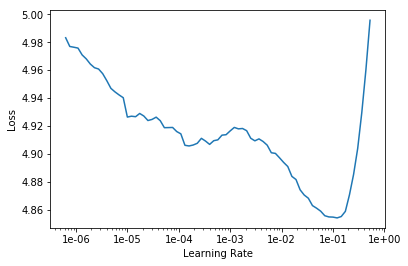

In [0]:
learn.recorder.plot(skip_end=15)

In [0]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,4.232034,4.060273,0.292894


In [0]:
learn.save('fit_head')

In [0]:
learn.load('fit_head');

To complete the fine-tuning, we can then unfeeze and launch a new training.

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
1,3.712088,3.726514,0.283750,01:03
2,3.567067,3.615324,0.300551,01:03
3,3.382950,3.516003,0.316935,01:03
4,3.167136,3.447631,0.328467,01:03
5,2.940979,3.414895,0.335729,01:03
6,2.757712,3.408578,0.340565,01:03
7,2.612724,3.413921,0.342604,01:03
8,2.502638,3.416965,0.343378,01:03
9,2.386293,3.425055,0.344137,01:03
10,2.361985,3.433965,0.343527,01:03


In [0]:
learn.save('fine_tuned')

How good is our model? Well let's try to see what it predicts after a few given words.

In [0]:
learn.load('fine_tuned');

In [0]:
TEXT = "Make America Great again"
N_WORDS = 40
N_SENTENCES = 2

In [0]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

Make America Great again [ Applause ] thank you thank you very much thank you thank you [ Music ] [ Music ] [ Music ] [ Music ] [ Applause ] [ Music ] you you
Make America Great again Thank You Man the American People for Thank You Man oh no Oh beautiful let me tell you mr . Trump thank you for being here today and where are


We not only have to save the model, but also it's encoder, the part that's responsible for creating and updating the hidden state. For the next part, we don't care about the part that tries to guess the next word.

In [0]:
learn.save_encoder('fine_tuned_enc')

## Classifier

Now, we'll create a new data object that only grabs the labelled data and keeps those labels. Again, this line takes a bit of time.

In [0]:
path = untar_data(URLs.IMDB)

In [0]:
data_clas = (TextList.from_folder(path, vocab=data_lm.vocab)
             #grab all the text files in path
             .split_by_folder(valid='test')
             #split by train and valid folder (that only keeps 'train' and 'test' so no need to filter)
             .label_from_folder(classes=['neg', 'pos'])
             #label them all with their folders
             .databunch(bs=bs))

data_clas.save('data_clas.pkl')

In [0]:
data_clas = load_data(path, 'data_clas.pkl', bs=bs)

In [0]:
data_clas.show_batch()

text,target
xxbos xxmaj match 1 : xxmaj tag xxmaj team xxmaj table xxmaj match xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley vs xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley started things off with a xxmaj tag xxmaj team xxmaj table xxmaj match against xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit . xxmaj according to the rules,pos
"xxbos xxmaj titanic directed by xxmaj james xxmaj cameron presents a fictional love story on the historical setting of the xxmaj titanic . xxmaj the plot is simple , xxunk , or not for those who love plots that twist and turn and keep you in suspense . xxmaj the end of the movie can be figured out within minutes of the start of the film , but the love",pos
"xxbos xxmaj here are the matches . . . ( adv . = advantage ) \n\n xxmaj the xxmaj warriors ( xxmaj ultimate xxmaj warrior , xxmaj texas xxmaj tornado and xxmaj legion of xxmaj doom ) v xxmaj the xxmaj perfect xxmaj team ( xxmaj mr xxmaj perfect , xxmaj ax , xxmaj smash and xxmaj crush of xxmaj demolition ) : xxmaj ax is the first to go",neg
"xxbos i felt duty bound to watch the 1983 xxmaj timothy xxmaj dalton / xxmaj zelah xxmaj clarke adaptation of "" xxmaj jane xxmaj eyre , "" because i 'd just written an article about the 2006 xxup bbc "" xxmaj jane xxmaj eyre "" for xxunk . \n\n xxmaj so , i approached watching this the way i 'd approach doing homework . \n\n i was irritated at first",pos
"xxbos xxmaj no , this is n't a sequel to the fabulous xxup ova series , but rather a remake of the events that occurred after the death of xxmaj xxunk ( and the disappearance of xxmaj woodchuck ) . xxmaj it is also more accurate to the novels that inspired this wonderful series , which is why characters ( namely xxmaj orson and xxmaj xxunk ) are xxunk ,",pos


We can then create a model to classify those reviews and load the encoder we saved before.

In [0]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')

In [0]:
learn.lr_find()

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.310078,0.197204,0.926960


In [0]:
learn.save('first')

In [0]:
learn.load('first');

In [0]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.255913,0.169186,0.937800


In [0]:
learn.save('second')

In [0]:
learn.load('second');

In [0]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.223174,0.165679,0.939600


In [0]:
learn.save('third')

In [0]:
learn.load('third');

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.240424,0.155204,0.943160
2,0.217462,0.153421,0.943960


In [0]:
learn.predict("I really loved that movie, it was awesome!")

(Category pos, tensor(1), tensor([7.5928e-04, 9.9924e-01]))